In [34]:
import pandas as pd
import numpy as np

In [35]:
df=pd.read_csv('/Users/xinyuanliang/Desktop/MBAN 6110/module_5_feature_engineering_demo.csv')

In [36]:
df.head()

,Unnamed: 0,Height,Weight,Calories_Intake,Exercise_Time,BMI,Age,Resting_Heart_Rate
0,0,187.640523,81.119254,1733.539473,4.593274,23.039374,70,54.540176
1,1,174.001572,87.849478,1644.014918,3.568722,29.015686,38,63.510746
2,2,179.787380,61.553704,2523.067529,2.885513,19.043018,76,49.502603
3,3,192.408932,72.094281,2020.812760,3.251630,19.473784,35,72.310220
4,4,188.675580,74.561067,2459.594194,1.789144,20.945017,49,67.864721


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Height              1000 non-null   float64
 2   Weight              1000 non-null   float64
 3   Calories_Intake     1000 non-null   float64
 4   Exercise_Time       1000 non-null   float64
 5   BMI                 1000 non-null   float64
 6   Age                 1000 non-null   int64  
 7   Resting_Heart_Rate  1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


In [38]:
df.describe()

,Unnamed: 0,Height,Weight,Calories_Intake,Exercise_Time,BMI,Age,Resting_Heart_Rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,169.547433,70.272339,2474.385718,2.981057,24.723887,50.254000,61.239327
std,288.819436,9.875270,19.372889,477.297134,1.016321,7.519788,17.288852,10.582063
min,0.000000,139.538569,10.107743,941.571704,-0.740101,3.316609,20.000000,30.178604
25%,249.750000,163.015799,56.923004,2131.667664,2.289527,19.339657,35.000000,54.513691
50%,499.500000,169.419720,70.521240,2473.751089,2.971734,24.388768,51.000000,60.891872
75%,749.250000,176.069506,82.509601,2810.808044,3.661825,29.134636,65.000000,68.385709
max,999.000000,197.593551,133.419495,3964.548121,6.801660,50.729842,79.000000,99.312380


In [39]:
#data cleaning
df.isnull().sum()

df.dropna(inplace=True)

df.drop('Unnamed: 0', axis=1, inplace=True)

In [40]:
df

,Height,Weight,Calories_Intake,Exercise_Time,BMI,Age,Resting_Heart_Rate
0,187.640523,81.119254,1733.539473,4.593274,23.039374,70,54.540176
1,174.001572,87.849478,1644.014918,3.568722,29.015686,38,63.510746
2,179.787380,61.553704,2523.067529,2.885513,19.043018,76,49.502603
3,192.408932,72.094281,2020.812760,3.251630,19.473784,35,72.310220
4,188.675580,74.561067,2459.594194,1.789144,20.945017,49,67.864721
...,...,...,...,...,...,...,...
995,174.128708,71.955016,3539.588332,2.496110,23.731234,36,58.531050
996,168.016011,98.030468,2046.267009,4.779559,34.726398,32,63.266300
997,170.941923,73.168677,2403.797896,2.969428,25.039637,20,52.155337
998,158.523891,47.161972,1893.742128,4.577088,18.767331,72,57.429598


In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
# Standardize the features

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)





In [43]:
# Perform PCA

pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

df_pca


array([[-0.39526776, -1.18294847],
       [ 0.81908203, -0.2059618 ],
       [-1.17186595, -0.46918293],
       ...,
       [ 0.01029964, -0.71490497],
       [-1.00000789, -1.36482824],
       [-1.55282057,  1.3970936 ]])

In [44]:
# The transformed data is an array, convert it back into a dataframe

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca.head()




,PC1,PC2
0,-0.395268,-1.182948
1,0.819082,-0.205962
2,-1.171866,-0.469183
3,-1.106793,0.798769
4,-0.772500,1.500282


In [45]:

# Print the explained variance ratio

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))




[0.28857346 0.18072185]
0.46929530764507066


In [46]:

# Print the cumulative explained variance ratio

print(pca.explained_variance_ratio_.cumsum())


[0.28857346 0.46929531]


In [47]:
# Show the first few rows of transformed dataframe

df_pca.head()




,PC1,PC2
0,-0.395268,-1.182948
1,0.819082,-0.205962
2,-1.171866,-0.469183
3,-1.106793,0.798769
4,-0.772500,1.500282


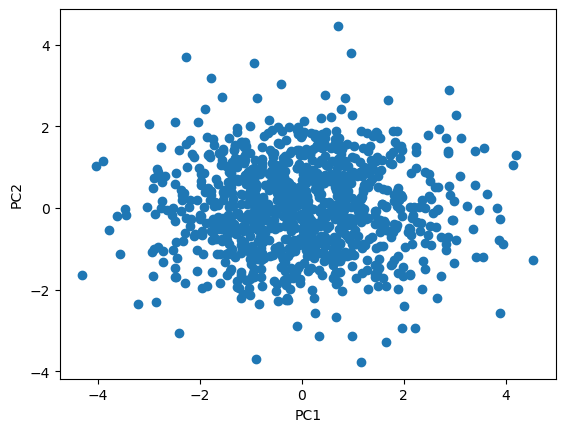

In [48]:
# Plot the transformed data

import matplotlib.pyplot as plt

plt.scatter(df_pca['PC1'], df_pca['PC2'])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [49]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [50]:
# Print the first few rows of the dataframe

bikes.head()





,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [51]:
# Print the info of the dataframe

bikes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [52]:
# Print the summary statistics of the dataframe

bikes.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [53]:
# Print the number of missing values in each column

bikes.isnull().sum()

# Drop the missing values

bikes.dropna(inplace=True)
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [54]:
# Transform datetime to a datetime data formate

bikes['datetime'] = pd.to_datetime(bikes['datetime'])

bikes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [55]:
# Extract the hour from the datetime column

bikes['hour'] = bikes['datetime'].dt.hour



# Extract the day of the week from the datetime column

bikes['dayofweek'] = bikes['datetime'].dt.dayofweek



# Extract the month from the datetime column

bikes['month'] = bikes['datetime'].dt.month

bikes.head()





,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1


In [56]:
# Create function to classify amounts of count

def classify_count(x):
    if x < 100:
        return 'low'
    elif x < 200:
        return 'medium'
    else:
        return 'high'
    
# Apply the function to the count column

bikes['count_class'] = bikes['count'].apply(classify_count)

bikes.head()







,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,month,count_class
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,low
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,low
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,low
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,low
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,low


In [57]:
# Create function with 2 inputs - temp and humidity - to classify good/bad days

def classify_day(temp, humidity):
    if temp > 27 and humidity < 40:
        return 'good'
    else:
        return 'bad'
    
# Apply the function to the temp and humidity columns

bikes['day_type'] = bikes.apply(lambda x: classify_day(x['temp'], x['humidity']), axis=1)

def application_function(x):
    classify_day(x['temp'],x['humidity'])


bikes.head()






,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,month,count_class,day_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,low,bad
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,low,bad
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,low,bad
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,low,bad
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,low,bad


In [59]:
# Dummy variables - convert season to dummies; first - rename season

bikes['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'}, inplace=True)

bikes.head()



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,month,count_class,day_type
0,2011-01-01 00:00:00,winter,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,low,bad
1,2011-01-01 01:00:00,winter,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,low,bad
2,2011-01-01 02:00:00,winter,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,low,bad
3,2011-01-01 03:00:00,winter,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,low,bad
4,2011-01-01 04:00:00,winter,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,low,bad


In [64]:
# Create dummies

season_dummies = pd.get_dummies(bikes['season'])

season_dummies.head()




,fall,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [65]:
# Concatenate the dummies to the original dataframe 

bikes = pd.concat([bikes, season_dummies], axis=1)

bikes.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month,count_class,day_type,spring,summer,winter,fall,spring,summer,winter
0,2011-01-01 00:00:00,winter,0,0,1,9.84,14.395,81,0.0,3,...,1,low,bad,0,0,1,0,0,0,1
1,2011-01-01 01:00:00,winter,0,0,1,9.02,13.635,80,0.0,8,...,1,low,bad,0,0,1,0,0,0,1
2,2011-01-01 02:00:00,winter,0,0,1,9.02,13.635,80,0.0,5,...,1,low,bad,0,0,1,0,0,0,1
3,2011-01-01 03:00:00,winter,0,0,1,9.84,14.395,75,0.0,3,...,1,low,bad,0,0,1,0,0,0,1
4,2011-01-01 04:00:00,winter,0,0,1,9.84,14.395,75,0.0,0,...,1,low,bad,0,0,1,0,0,0,1


In [66]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [67]:
df = pd.read_csv("/Users/xinyuanliang/Desktop/MBAN 6110/new_data.csv")
df.head(10)

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,5,2019-11-01 00:00:01 UTC,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
6,6,2019-11-01 00:00:01 UTC,view,1306421,2053013558920217191,computers.notebook,hp,514.56,514028527,df8184cc-3694-4549-8c8c-6b5171877376
7,7,2019-11-01 00:00:02 UTC,view,15900065,2053013558190408249,NaN,rondell,30.86,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f
8,8,2019-11-01 00:00:02 UTC,view,12708937,2053013553559896355,NaN,michelin,72.72,532364121,0a899268-31eb-46de-898d-09b2da950b24
9,9,2019-11-01 00:00:02 UTC,view,1004258,2053013555631882655,electronics.smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0


In [69]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...
9999995,2019-11-07 05:08:21 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,915.69,517800555,c6b764e0-561c-4c17-a546-2e922196bb49
9999996,2019-11-07 05:08:21 UTC,view,12707281,2053013553559896355,NaN,gislaved,90.86,539095445,b1673b33-d0ff-4a09-bf57-56dedc3d016e
9999997,2019-11-07 05:08:21 UTC,view,3601405,2053013563810775923,appliances.kitchen.washer,beko,180.16,548916637,e020a307-551c-4e58-a787-126701d30d41
9999998,2019-11-07 05:08:21 UTC,view,12711053,2053013553559896355,NaN,tunga,32.69,521586999,c8c48941-2ca1-4ce4-8d44-c96eb5df4fb5


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 686.6+ MB


In [73]:
# group by brands based on total price
df.groupby('brand')['price'].sum().sort_values(ascending=False).head(10)




brand
apple      7.941764e+08
samsung    3.994657e+08
xiaomi     1.441544e+08
acer       6.625119e+07
lg         6.446852e+07
huawei     6.024926e+07
sony       4.994830e+07
lenovo     4.839956e+07
asus       4.128366e+07
oppo       3.959087e+07
Name: price, dtype: float64